['x_-0.1_y_-0.05_z_1.0.png', 'x_-0.2_y_-0.2_z_1.75.png', 'x_0.15_y_0.05_z_0.5.png', 'x_0.35_y_-0.4_z_1.25.png'] ['x_-0.1_y_-0.05_z_1.0_r_0.0_target.jpg', 'x_-0.2_y_-0.2_z_1.75_r_0.0_target.jpg', 'x_0.15_y_0.05_z_0.5_r_0.0_target.jpg', 'x_0.35_y_-0.4_z_1.25_r_0.0_target.jpg']


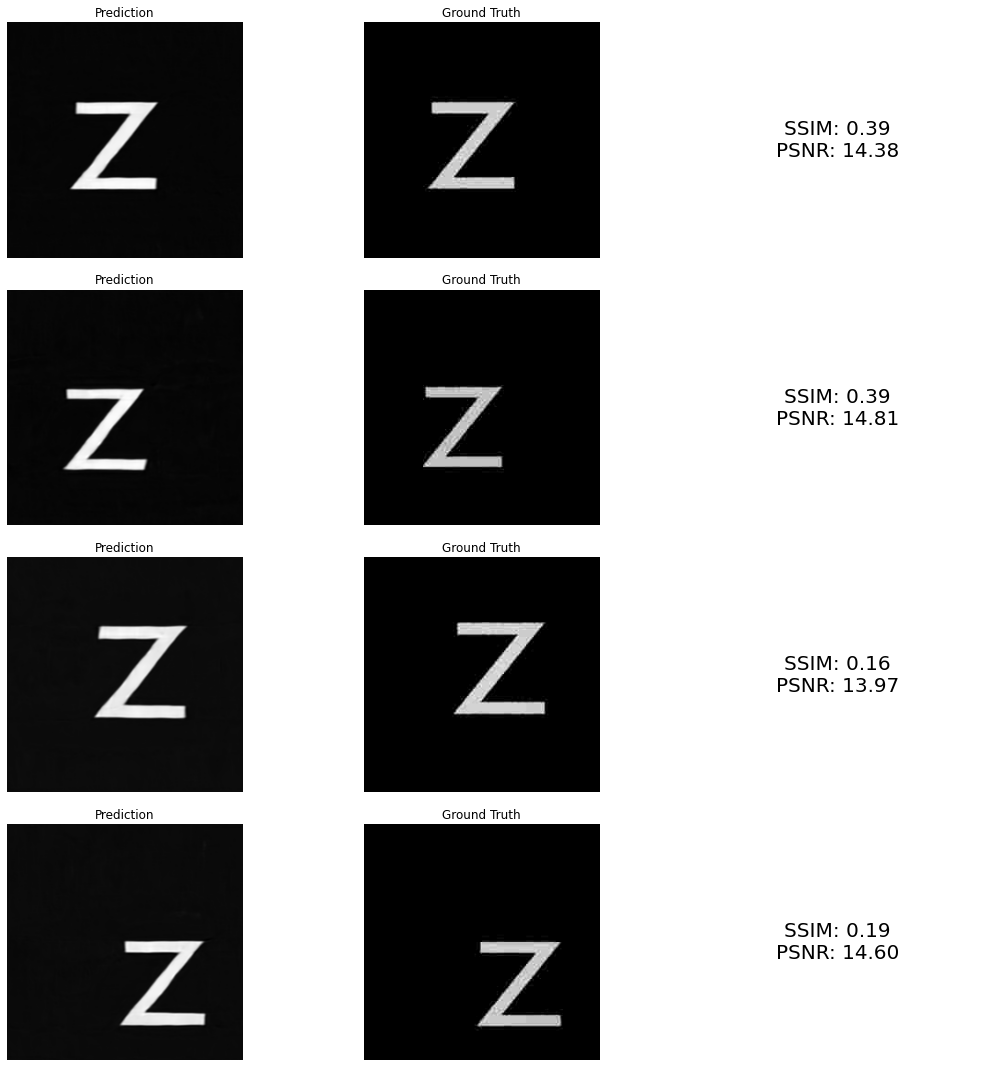

In [17]:
import matplotlib.pyplot as plt
import os
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage import io, img_as_float

# Define the paths to your folders
predictions_folder = '/home/mao/Documents/code/mitsuba2-transient-nlos/presentation/prediction/translation'
ground_truth_folder = '/home/mao/Documents/code/mitsuba2-transient-nlos/presentation/target/translation'

# Get the filenames in the folders
prediction_files = sorted(os.listdir(predictions_folder))
ground_truth_files = sorted(os.listdir(ground_truth_folder))

print(prediction_files, ground_truth_files)

# Create a figure to display the images
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
# fig.tight_layout()

# Adjust the space between the columns
plt.subplots_adjust(wspace=0.05)


# Loop through the images
for i, (pred_file, gt_file) in enumerate(zip(prediction_files, ground_truth_files)):
    # Read the images
    pred_image = img_as_float(io.imread(os.path.join(predictions_folder, pred_file)))
    gt_image = img_as_float(io.imread(os.path.join(ground_truth_folder, gt_file)))

    # Check the filenames match
    assert pred_file[:15] == gt_file[:15], "Filenames must match"

    # Calculate SSIM and PSNR
    similarity_index, _ = ssim(pred_image, gt_image, full=True)
    peak_snr = psnr(pred_image, gt_image)

# Display the predicted image
    axes[i, 0].imshow(pred_image, cmap='gray')
    axes[i, 0].set_title('Prediction')
    axes[i, 0].axis('off')

    # Display the ground truth image
    axes[i, 1].imshow(gt_image, cmap='gray')
    axes[i, 1].set_title('Ground Truth')
    axes[i, 1].axis('off')

    # Display SSIM and PSNR values
    axes[i, 2].axis('off')
    axes[i, 2].text(0.5, 0.5, f'SSIM: {similarity_index:.2f}\nPSNR: {peak_snr:.2f}', 
                    horizontalalignment='center', verticalalignment='center', fontsize=20)


plt.show()


In [10]:
a='x_0.35_y_-0.4_z_1.25.png'
b='x_0.35_y_-0.4_z_1.25_r_0.0_target.jpg'

#assert a[:-4]==b[:15]

a[:18],b[:18]

('x_0.35_y_-0.4_z_1.', 'x_0.35_y_-0.4_z_1.')